In [ ]:
#Start all notebooks with this line.  It sets a lot of variables to values we want to use,
#and reads in some important packages of routines, too.
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['e']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


##  Protoplanetary disk SED

The goal of this problem is to understand Spectral Energy Distributions (SEDs), the spectra emitted by
a star plus a disk. Using some simple assumptions, you'll generate your own model SED. For this problem,
assume the star has the properties adopted by Chiang \& Goldreich (an effective temperature of 4000 K, a
mass of 0.5 solar masses, and a radius of 2.5 solar radii). For the disk, assume an opaque disk extending
from the approximate location of the dust sublimation radius (0.05 AU) out to 100 AU. We will also assume that the dust in the disk radiates as a perfect
blackbody. For this problem, use the following form of the blackbody equation:
\begin{equation}
I_\nu (T) = \frac{2\pi h \nu^3}{c^2} \frac{1}{e^{h\nu/ k T} - 1}\ \   \mathrm{[Energy/area/time/Hz]}
\end{equation}

### 1(a):  Assuming the protoplanetary disk is perfectly thin, find an approximate expression for the incidence angle, $\alpha$, a ray of light would have (i.e., the angle between the ray and the disk surface) if it's emitted from the top of the star of radius $R_\star$ and impacts the disk at a distance $a$ from the center of the star.  You can assume $a>>R_\star$.  

Because the an upright line from the center of the star extending to the top of $R_\star$ and the line from the center of star $a$ as length makes a right angle, and $\alpha$ is mesuring the angle from the top of star of radius $r_\star$ from the center, $\alpha$ would follow
$$\alpha = tan(R_\star/a)$$
assuming that $a >>R_\star$, 
$$\alpha = R_\star/a$$

### 1(b): Following similar steps to those used to derive the equilibrium temperature of a planet, find the equilibrium temperature of a small ring in the disk (say, of size $da$) at a distance $a$ from the center of the star.  Assume the disk is a perfect blackbody, and that all rays of light impact the disk at the angle $\alpha$ you derived above.  Express your final answer only in terms of $T_\star$, $R_\star$ and $a$.  Let's call this $T_d$. 

To find the equilibrium temperature of a small ring, the energy in must equal the energy out. The Energy in for the disk is multiplied by sin$\alpha$, which is the the vertical proportion of starlight, the amount recieved by the disk.
$$E_{in} = E_{out}$$
$$ \frac{L_\star sin \alpha}{4 \pi a^2} da = \sigma T_d da$$
Because $a<< R$, sin$\alpha$ can be approximated as $\alpha$, plugging in this and $L_\star = 4\pi R_\star^2 \sigma T_\star$ into the equation and simplifying, 
$$\frac{T_\star^4 R_\star^3} {a^3} = T_d^4$$
so
$$T_d = T_\star (R_\star/a)^{3/4}$$

### 1(c): Express the equation for equilibrium temperature of a planet, $T_e$, given in terms of $T_\star$, $R_\star$, $a$, and any relevant constants.  (You can rederive this equation if you wish, or find it in your ASTR 230 notes.)

From ASTR 230, the equilibrium temperature of a planet is
$$T_e = T_\star \sqrt{\frac{R_\star}{2a}}$$

### 1(d): Explain qualitatively how and why these expressions differ.  Also, make a plot of $T_d$ and planetary equilibrium temperature, $T_e$, vs. $a$, assuming the values given above, and using a log scale for the x axis.  What is the temperature at 1 AU for each case?

While the equilibrium temperature of a planet decreases by a factor of $a^{1/2}$ relative to the semimajor axis, the equilibrium temperature of a disk decreases by a factor of $a^{3/4}$. This is because while the stellar flux absorbed by a planet is only dependent on the semimajor axis of the planet, the flux absorbed by the disk also depends on the incident angle, which is the vertical proportion of the star's luminosity. The angle is dependent on the star's radius and the semimajor axis, so the farther away the disk is the less the vertical proportion of the star's luminosity becomes. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


Temperature of a Protoplanetary Disk at 1 AU: 140 K
Temperature of a Planet at 1 AU: 303 K


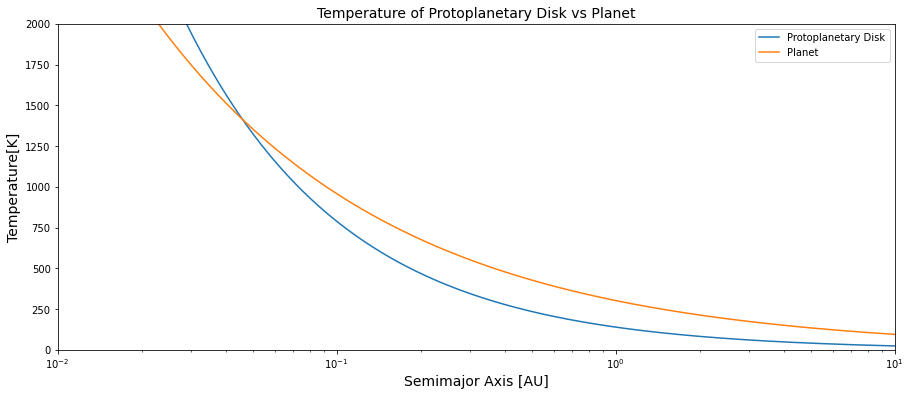

In [ ]:
a=np.arange(0.0046,10.0046,0.001)
r_star = 0.0046*2.5 ##radius of sun in au
t_star = 4000 ##sun surface temperature in k

td= t_star * (r_star/a)**0.75 ##temperature of protoplanetary disk
te= t_star * (r_star/(2*a))**0.5 ##temperature of a planet

fig= plt.figure(figsize=(15, 6))
plt.xscale("log")
ax = fig.add_subplot(111)
ax.set_xlim(0.01,10)
ax.set_ylim(0,2000)

ax.set_xlabel("Semimajor Axis [AU]", fontsize=14)
ax.set_ylabel("Temperature[K]", fontsize=14)
ax.set_title("Temperature of Protoplanetary Disk vs Planet", fontsize=14)

ax.plot(a, td, label = 'Protoplanetary Disk')
ax.plot(a, te, label = 'Planet')
leg = plt.legend(loc='upper right')

print("Temperature of a Protoplanetary Disk at 1 AU:", round(t_star * (r_star)**0.75), "K")
print("Temperature of a Planet at 1 AU:", round(t_star * (r_star/(2))**0.5), "K")

### 1(e): Assuming that we are viewing the star and disk from directly above (i.e. along the pole) at a distance of 150 parsecs, plot a spectral energy distribution (SED) for the star alone, the disk alone, and the star plus disk at wavelengths of 0.1 $\mu$m to 3 mm.  By convention, the y axis for an SED is $\nu F_\nu$, where $F_\nu$ is the flux of light detected by an observer at that frequency (in units of Energy per unit area per unit time per Hz), and $\nu$ is the frequency (in Hz), while the x axis is wavelength.  Use a log-log scale, and use Furlan et al. 2006 to make sure you're in the right ballpark.  Big hint: Create a model disk that consists of a series of concentric rings at distances $a_i$, each with temperature $T_d(a_i)$.  Compute the flux received by an observer for each ring, and add them together to create the disk SED.

The units of $I_\nu$ is in Energy/Area/Time/Hz, and so is $F_\nu$. 

$$F_\nu = \frac{I_\nu * A_{emiter}}{A_{observer}}$$
so for a star,
$$F_\nu = \frac{I_\nu  4 \pi r^2}{4 \pi d^2}$$
$$F_\nu = \frac{I_\nu  r^2}{d^2}$$
where d is the distance from Earth to the disk, r is the radius of the star, and $A_{emiter}$ is the surface area of the emission source.

For a star, the surface area would just be the surface area of a sphere with radius r. For a protoplanetary disc, $F_\nu$ would be the sum of the radiance at a semi-major axis times the small ring around it with width $a_i$.
For this 
$$F_\nu =  Σ \frac{I_\nu(T(a))  2 \pi a a_i}{4 \pi d^2}$$
$$F_\nu =  Σ \frac{I_\nu(T(a)) a a_i}{2 d^2}$$

Where $I_\nu$ is in terms of temperature, which itself is in terms of a, the semi-major axis.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


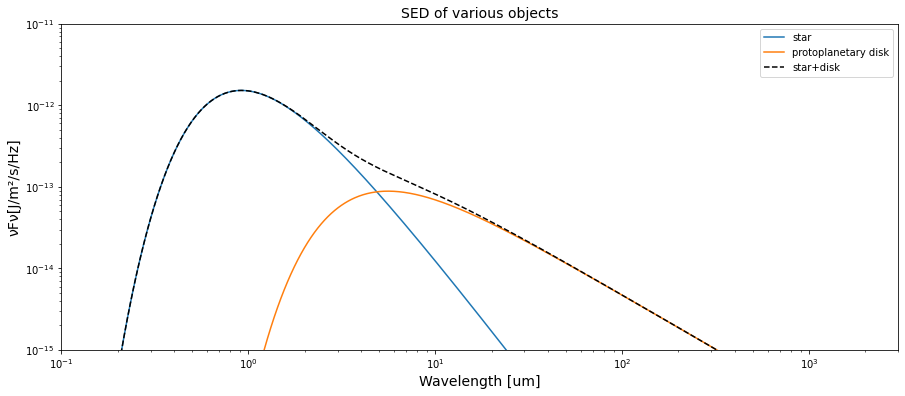

In [ ]:
h = 6.62e-34
v=np.logspace(11, 15.477, num=1000) ##creating a list of numbers from 0.1um to 3mm on a log scale
c = 3e8
lmbd = c/v*1e6 ##changing units into micrometers
e = 2.718
r_star1 = 7e8*2.5
k = 1.38e-23 ##setting up constants
d = 4.63e18 ##distance from earth to disk in m
a=np.arange(0.07,100,0.01) ##edges of the ppd
a1 = 1.5e11*a ##converting from au to m

def F_star (v,t):
  return 2*3.14*h*v**4/(c**2*   (e**(h*v/(k*t)) -1)  ) * r_star1**2/(d**2) ##vF_v

ai = 0.01*1.5e11 ##width of ai, which is defined by the number of "a" there is in last problem
def F_ppd (v,a):
  t = t_star * (r_star/a)**0.75 ##equilibrium temperature of protoplanetary disc

  b=0
  ff = np.zeros(v.size)
  for x in v: ##loop that creates an array for the vF_v of different frequencies
    aa=0
    b1=0
    for y in a: ##creates a loop that takes the sum of vF_v for all temperatures of a given frequency
      aa+= 2*3.14*h*v[b]**4/(c**2*(e**(h*v[b]/(k*t[b1])) -1)) *a1[b1]*ai/ (2*d**2)
      b1+=1
    ff[b] = aa
    b+=1

  return ff
  

fstar = F_star(v,t_star)
fppd = F_ppd(v,a)

fig= plt.figure(figsize=(15, 6))
plt.xscale("log")
plt.yscale("log")
ax = fig.add_subplot(111)
ax.set_xlim(0.1,3000)
ax.set_ylim(1e-15,1e-11)

ax.set_xlabel("Wavelength [um]", fontsize=14)
ax.set_ylabel("νFν[J/m\N{SUPERSCRIPT TWO}/s/Hz]", fontsize=14)
ax.set_title("SED of various objects", fontsize=14)

ax.plot(lmbd, fstar, label = 'star')
ax.plot(lmbd, fppd, label = 'protoplanetary disk')
ax.plot(lmbd, fppd+fstar, '--',color='black', label = 'star+disk')
leg = plt.legend(loc='upper right')

My units for this are in SI units, whereas Furlan et al has them in cgs, so in order to compare with them, my units will have to be multiplied by a factor of 
$10^7/10^4 = 10^3$. After changing it, the stellar SED peak at around the same Flux. Both Furlan et al and my protoplanetary disk's peak Flux is about 10 times smaller than the stellar peak flux.

### 1(f): Create a new model in which the disk has been cleared from the stellar surface out to a distance of 5 AU, but that the disk resumes after that. (This might happen if a giant planet has formed and cleared out part of the disk). Plot an SED for this system.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


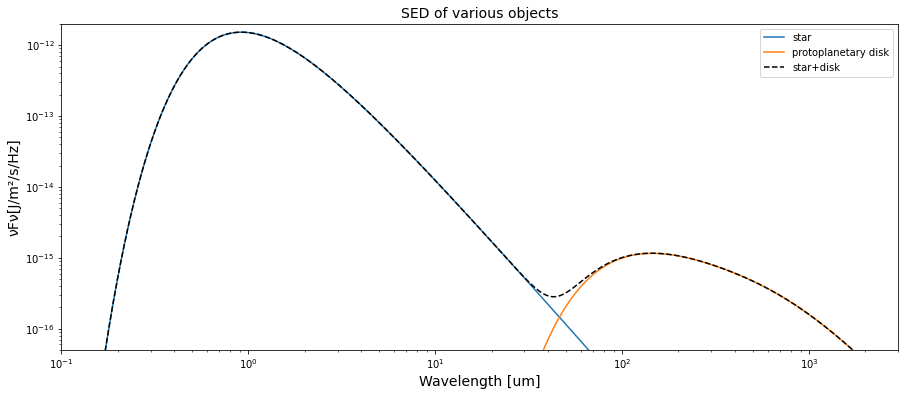

In [ ]:
a=np.arange(5,100,0.01) ##edges of the ppd
a1 = 1.5e11*a ##converting from au to m

fppd1 = F1_ppd(v,a)

def F1_ppd (v,a):
  t = t_star * (r_star/a)**0.75 ##equilibrium temperature of protoplanetary disc

  b=0
  ff = np.zeros(v.size)
  for x in v: ##loop that creates an array for the vF_v of different frequencies
    aa=0
    b1=0
    for y in a: ##creates a loop that takes the sum of vF_v for all temperatures of a given frequency
      aa+= 2*3.14*h*v[b]**4/(c**2*(e**(h*v[b]/(k*t[b1])) -1)) *a1[b1]*ai/ (2*d**2)
      b1+=1
    ff[b] = aa
    b+=1

  return ff

fig= plt.figure(figsize=(15, 6))
plt.xscale("log")
plt.yscale("log")
ax = fig.add_subplot(111)
ax.set_xlim(0.1,3000)
ax.set_ylim(0.5e-16,0.2e-11)

ax.set_xlabel("Wavelength [um]", fontsize=14)
ax.set_ylabel("νFν[J/m\N{SUPERSCRIPT TWO}/s/Hz]", fontsize=14)
ax.set_title("SED of various objects", fontsize=14)

ax.plot(lmbd, fstar, label = 'star')
ax.plot(lmbd, fppd1, label = 'protoplanetary disk')
ax.plot(lmbd, fppd1+fstar, '--',color='black', label = 'star+disk')
leg = plt.legend(loc='upper right')

### 1(g):  In this problem, we made several simplifying assumptions.  Add an additional complication to this model, of your choice.  Describe what you did, and what you learned.

In the previous model we made the assumption that the disk is flat, which is not likely to be the case, as the disk will most likely to flare at hydrostatic equilibrium. Chiang and Goldreich calculated that the equilibrium temperature of a flared disk is around 
$$\frac{550}{a^{2/5}AU}K$$
So I will try to model this

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


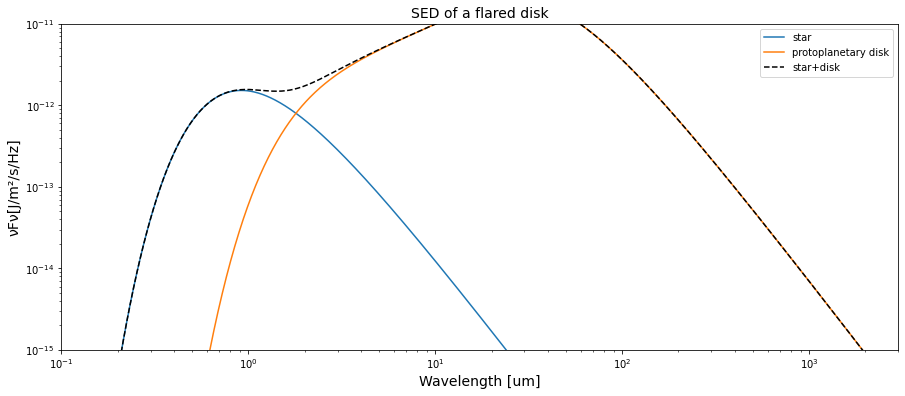

In [ ]:
h = 6.62e-34
v=np.logspace(11, 15.477, num=1000) ##creating a list of numbers from 0.1um to 3mm on a log scale
c = 3e8
lmbd = c/v*1e6 ##changing units into micrometers
e = 2.718
r_star1 = 7e8 *2.5
k = 1.38e-23 ##setting up constants
d = 4.63e18 ##distance from earth to disk in m
a=np.arange(0.07,100,0.01) ##edges of the ppd
a1 = 1.5e11*a ##converting from au to m

def F_star (v,t):
  return 2*3.14*h*v**4/(c**2*   (e**(h*v/(k*t)) -1)  ) * r_star1**2/(d**2) ##vF_v

ai = 0.01*1.5e11 ##width of ai, which is defined by the number of "a" there is in last problem
def F_ppd (v,a):
  t = 550 /(a**0.4) ##equilibrium temperature of flared disk

  b=0
  ff = np.zeros(v.size)
  for x in v: ##loop that creates an array for the vF_v of different frequencies
    aa=0
    b1=0
    for y in a: ##creates a loop that takes the sum of vF_v for all temperatures of a given frequency
      aa+= 2*3.14*h*v[b]**4/(c**2*(e**(h*v[b]/(k*t[b1])) -1)) *a1[b1]*ai/ (2*d**2)
      b1+=1
    ff[b] = aa
    b+=1

  return ff
  

fstar = F_star(v,t_star)
fppd = F_ppd(v,a)

fig= plt.figure(figsize=(15, 6))
plt.xscale("log")
plt.yscale("log")
ax = fig.add_subplot(111)
ax.set_xlim(0.1,3000)
ax.set_ylim(1e-15,1e-11)

ax.set_xlabel("Wavelength [um]", fontsize=14)
ax.set_ylabel("νFν[J/m\N{SUPERSCRIPT TWO}/s/Hz]", fontsize=14)
ax.set_title("SED of a flared disk", fontsize=14)

ax.plot(lmbd, fstar, label = 'star')
ax.plot(lmbd, fppd, label = 'protoplanetary disk')
ax.plot(lmbd, fppd+fstar, '--',color='black', label = 'star+disk')
leg = plt.legend(loc='upper right')